<a href="https://colab.research.google.com/github/Swetha233926/Emotion_Detection_CNN/blob/main/Oasis_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##supress warnings
import warnings
warnings.filterwarnings("ignore")

**Import dataset**

In [4]:
iris_df=pd.read_csv("/content/sample_data/Iris.csv")
print("The data has been successfully load")

The data has been successfully load


In [5]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**Data Exploration**

In [7]:
#check shape of data
iris_df.shape

(150, 6)

In [9]:
#check basic information of data
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
#check statistical summar of data
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
#check null values
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
print("unique number of values in dataset species:",iris_df["Species"].nunique())
print("unique species in iris dataset:",iris_df["Species"].unique())

unique number of values in dataset species: 3
unique species in iris dataset: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


**Exploratory Data Analysis**

Data visualization

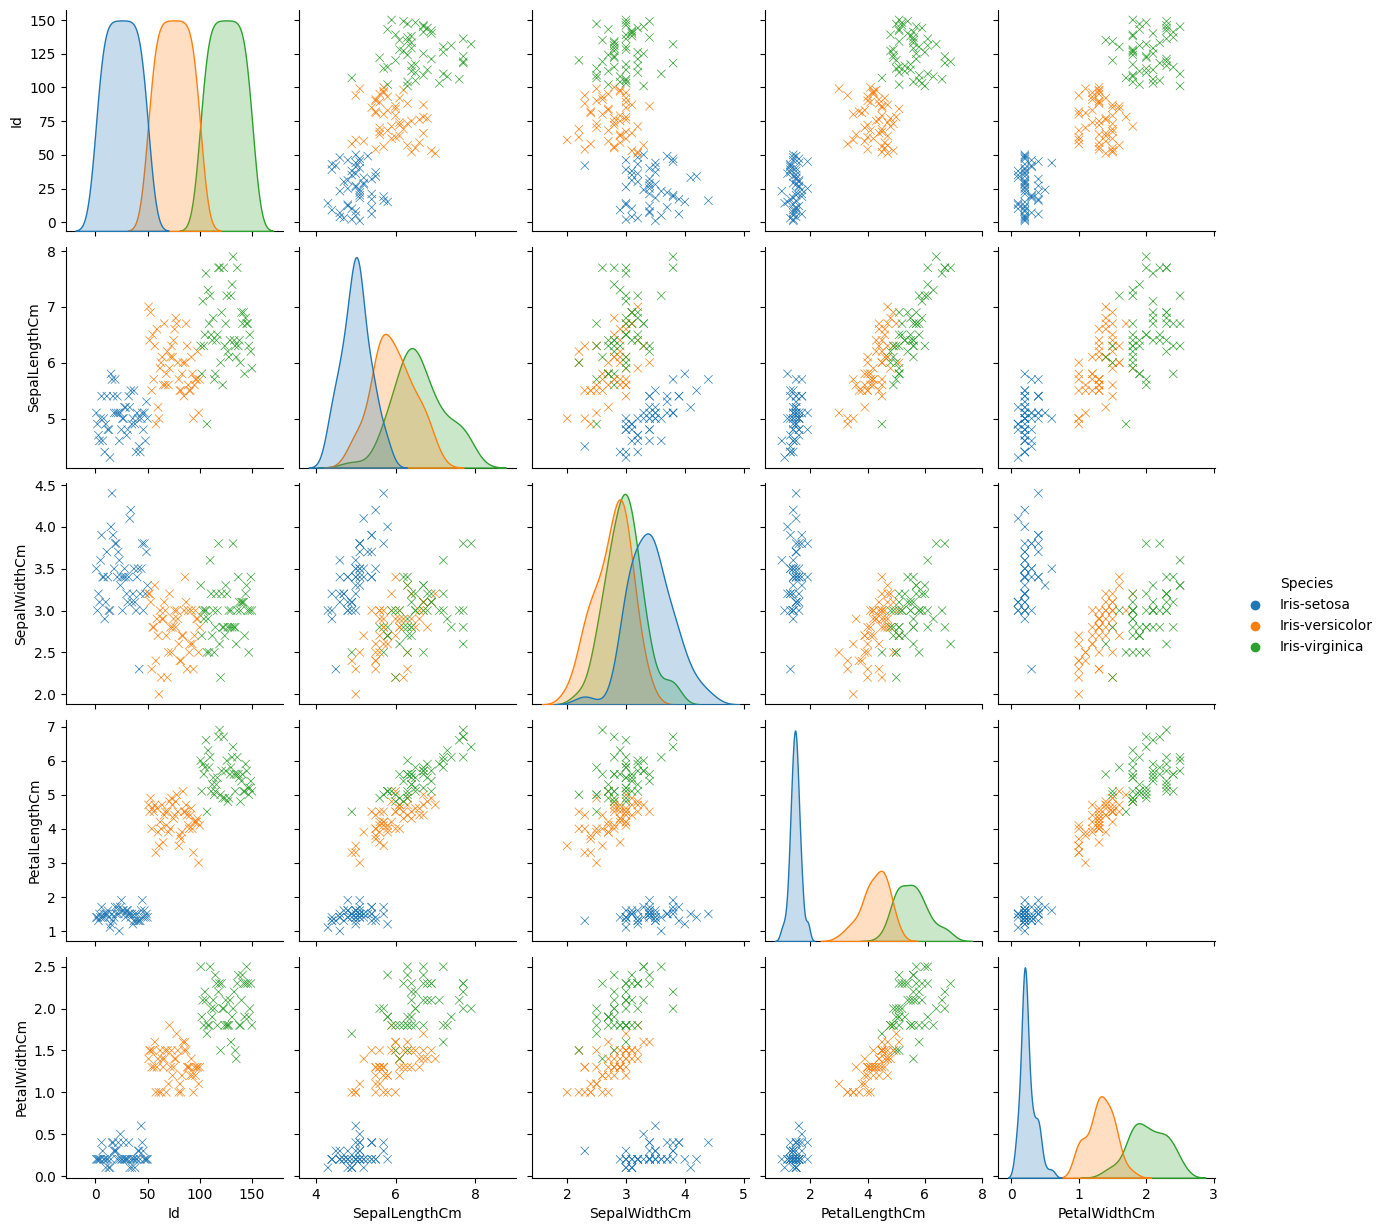

In [13]:
sns.pairplot(iris_df, hue="Species",markers='x')
plt.show()

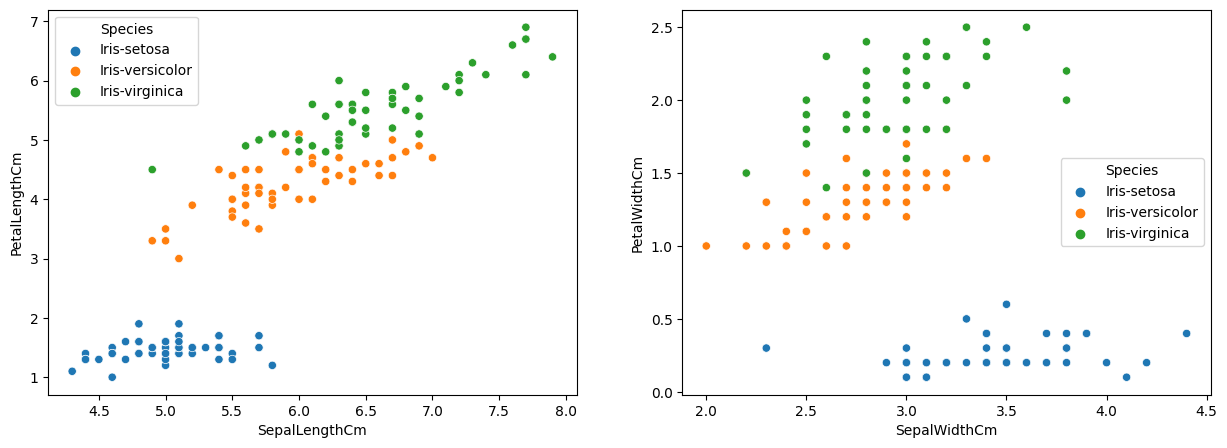

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=iris_df,hue='Species')
plt.subplot(1,2,2)
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=iris_df,hue='Species')
plt.show()

In [16]:
#check correlation in dataset
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


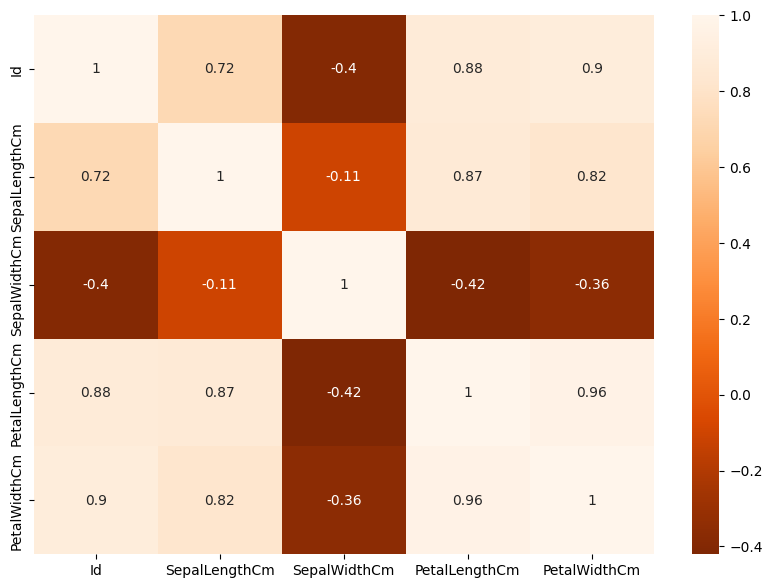

In [18]:
#use heatmap to see correlation
plt.figure(figsize=(10,7))
sns.heatmap(iris_df.corr(),annot=True,cmap="Oranges_r")
plt.show()

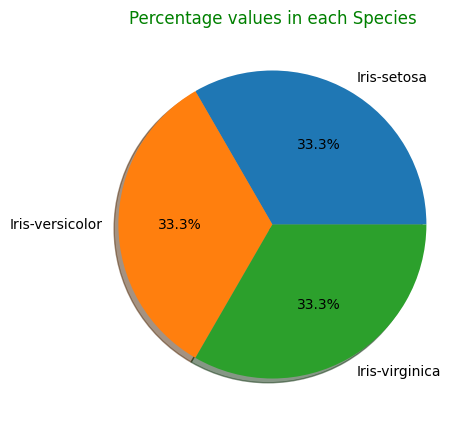

In [20]:
#check value counts
iris_df["Species"].value_counts().plot(kind='pie',autopct="%1.1f%%",shadow=True,figsize=(5,5))
plt.title("Percentage values in each Species", fontsize=12,c="g")
plt.ylabel("",fontsize=10,c="r")
plt.show()

**Scatterplot for Sepal Length and Sepal Width**

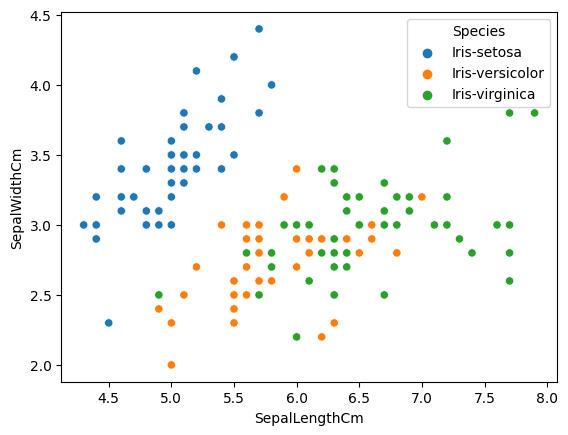

In [24]:
sns.scatterplot(x=iris_df["SepalLengthCm"], y=iris_df["SepalWidthCm"], hue=iris_df["Species"])

# Show the plot
plt.show()

**Scatterplot for Petal Length and Petal Width**

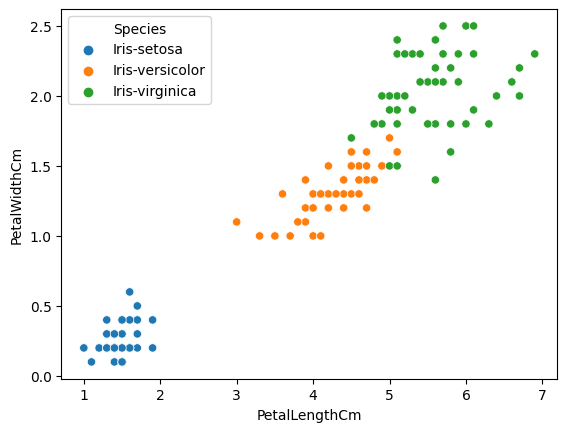

In [25]:
sns.scatterplot(x=iris_df["PetalLengthCm"], y=iris_df["PetalWidthCm"], hue=iris_df["Species"])

# Show the plot
plt.show()

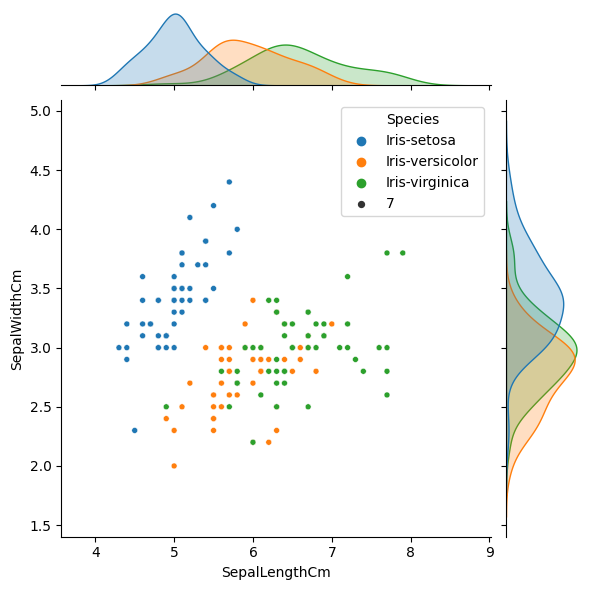

In [27]:
sns.jointplot(data=iris_df,x="SepalLengthCm", y="SepalWidthCm", size=7,hue="Species")

# Show the plot
plt.show()

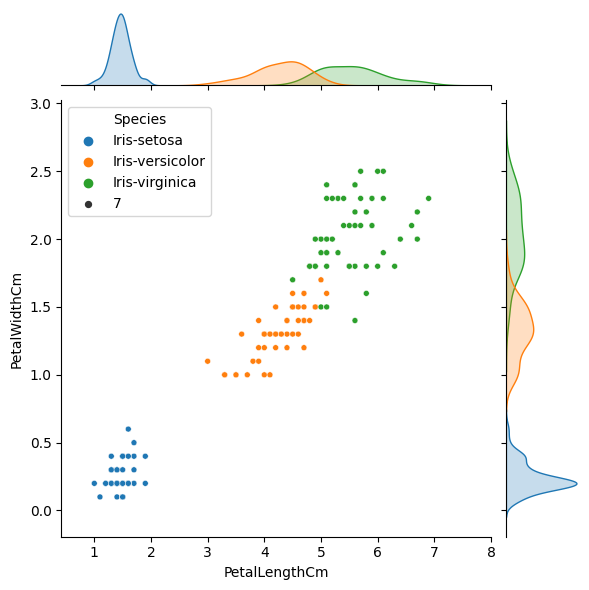

In [28]:
sns.jointplot(data=iris_df,x="PetalLengthCm", y="PetalWidthCm", size=7,hue="Species")

# Show the plot
plt.show()

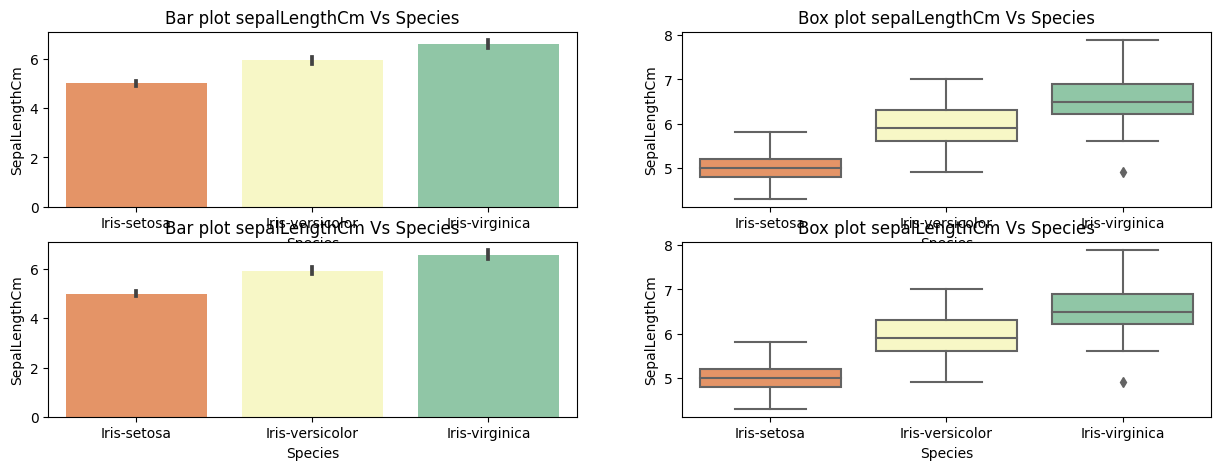

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.barplot(x="Species",y="SepalLengthCm",data=iris_df,palette=('Spectral'))
plt.title("Bar plot sepalLengthCm Vs Species")

plt.subplot(2,2,2)
sns.boxplot(x="Species",y="SepalLengthCm",data=iris_df,palette=('Spectral'))
plt.title("Box plot sepalLengthCm Vs Species")

plt.subplot(2,2,3)
sns.barplot(x="Species",y="SepalLengthCm",data=iris_df,palette=('Spectral'))
plt.title("Bar plot sepalLengthCm Vs Species")

plt.subplot(2,2,4)
sns.boxplot(x="Species",y="SepalLengthCm",data=iris_df,palette=('Spectral'))
plt.title("Box plot sepalLengthCm Vs Species")

plt.show()


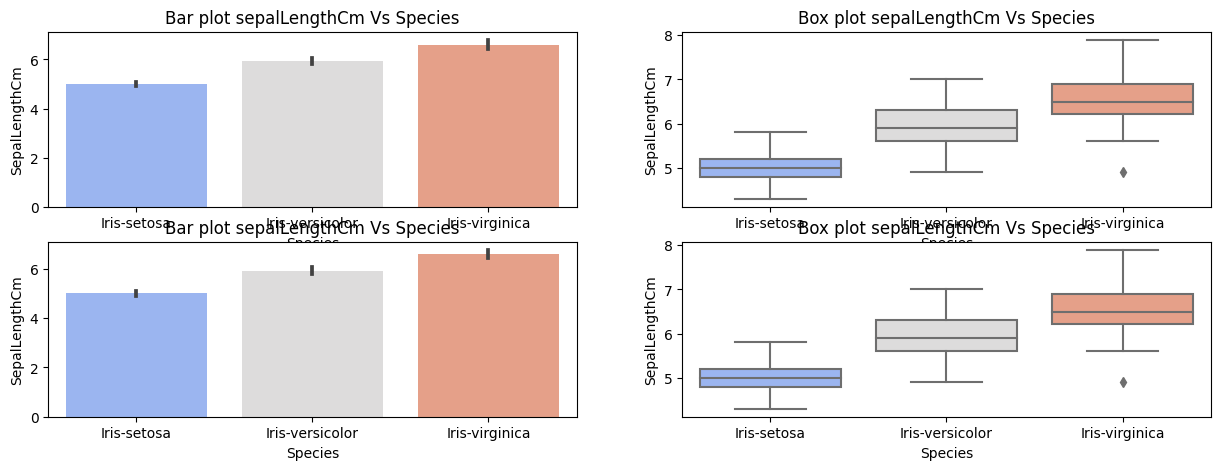

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
sns.barplot(x="Species",y="SepalLengthCm",data=iris_df,palette=('coolwarm'))
plt.title("Bar plot sepalLengthCm Vs Species")

plt.subplot(2,2,2)
sns.boxplot(x="Species",y="SepalLengthCm",data=iris_df,palette=('coolwarm'))
plt.title("Box plot sepalLengthCm Vs Species")

plt.subplot(2,2,3)
sns.barplot(x="Species",y="SepalLengthCm",data=iris_df,palette=('coolwarm'))
plt.title("Bar plot sepalLengthCm Vs Species")

plt.subplot(2,2,4)
sns.boxplot(x="Species",y="SepalLengthCm",data=iris_df,palette=('coolwarm'))
plt.title("Box plot sepalLengthCm Vs Species")

plt.show()

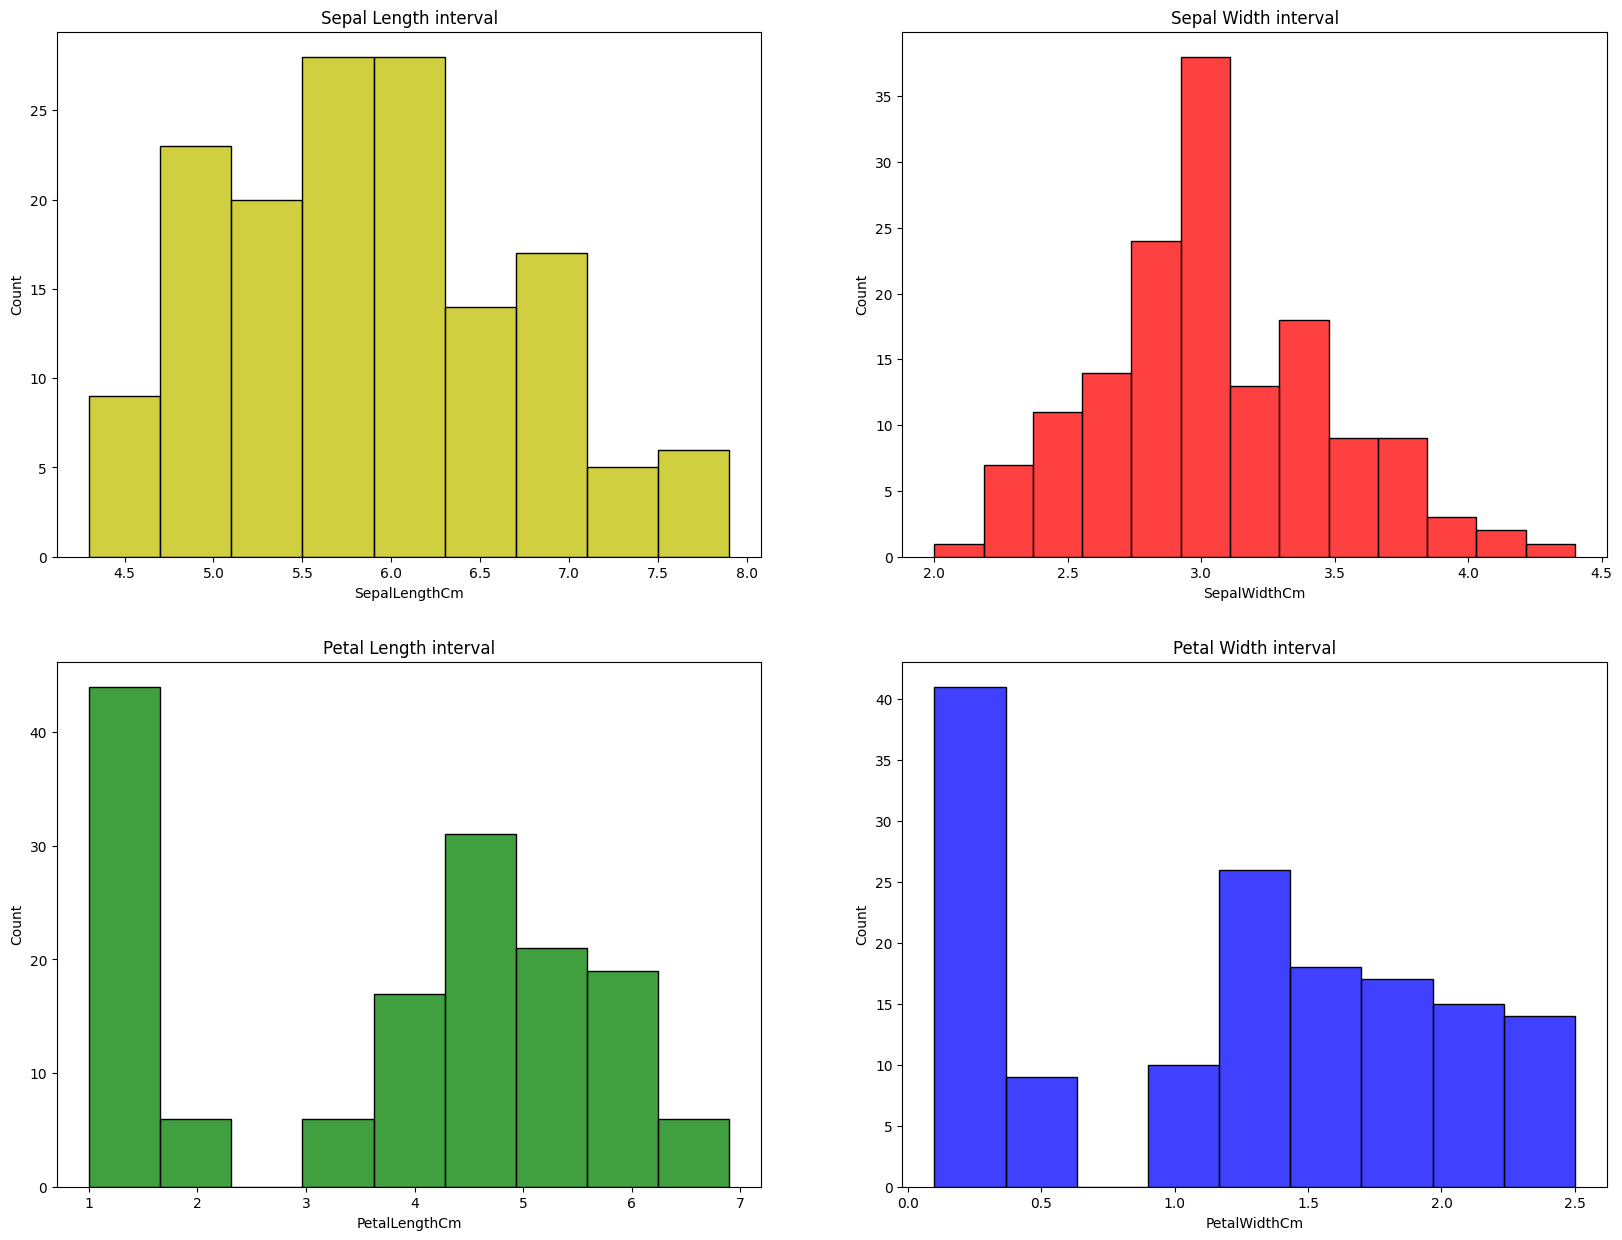

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
plt.figure(figsize=(20, 15))

# Subplot 1: Sepal Length
plt.subplot(2, 2, 1)
sns.histplot(iris_df['SepalLengthCm'], color="y")
plt.title("Sepal Length interval")

# Subplot 2: Sepal Width
plt.subplot(2, 2, 2)
sns.histplot(iris_df['SepalWidthCm'], color="r")
plt.title("Sepal Width interval")

# Subplot 3: Petal Length
plt.subplot(2, 2, 3)
sns.histplot(iris_df['PetalLengthCm'], color="g")
plt.title("Petal Length interval")

# Subplot 4: Petal Width
plt.subplot(2, 2, 4)
sns.histplot(iris_df['PetalWidthCm'], color="b")
plt.title("Petal Width interval")

# Show the subplots
plt.show()



**data Cleaning**

In [35]:
#change Categorical Data into numerical value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris_df["Species"]=le.fit_transform(iris_df['Species'])
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [36]:
iris_df['Species'].unique()


array([0, 1, 2])

In [37]:
x=iris_df.iloc[:,[0,1,2,3]]
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4


In [38]:
y=iris_df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [39]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


**Model Building**

Supervised Machine Learning

Split data into Training and Testing Set

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
print(x_train.shape)
print(x_train.shape)
print(y_train.shape)
print(y_train.shape)

(120, 4)
(120, 4)
(120,)
(120,)


In [42]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)
print("Logistic regression successfully implemented")
y_pred=lr.predict(x_test)

#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix:-")
print(cm)

accuracy=accuracy_score(y_test,y_pred)
print("accuracy is:-",accuracy*100)
print("Classification Report:-")
print(classification_report(y_test,y_pred))


Logistic regression successfully implemented
Confusion matrix:-
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is:- 100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Random Forest Classifier**

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
print("Random Forest Classifier successfully implemented")
y_pred=rfc.predict(x_test)

#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix:-")
print(cm)

#accuracy test
accuracy=accuracy_score(y_test,y_pred)
print("accuracy is:-",accuracy*100)
print("Classification Report:-")
print(classification_report(y_test,y_pred))

Random Forest Classifier successfully implemented
Confusion matrix:-
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is:- 100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Decision Tree**

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train, y_train)
print("Decision Tree Classifier successfully implemented")
y_pred=dtree.predict(x_test)

#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix:-")
print(cm)

#accuracy test
accuracy=accuracy_score(y_test,y_pred)
print("accuracy is:-",accuracy*100)
print("Classification Report:-")
print(classification_report(y_test,y_pred))

Decision Tree Classifier successfully implemented
Confusion matrix:-
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy is:- 96.66666666666667
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [45]:
from sklearn.tree import plot_tree

In [46]:
#for visualizing the Decision Tree
feature=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
classes=['Iris-Setosa','Iris-Versicolor','Iris-Virginica']

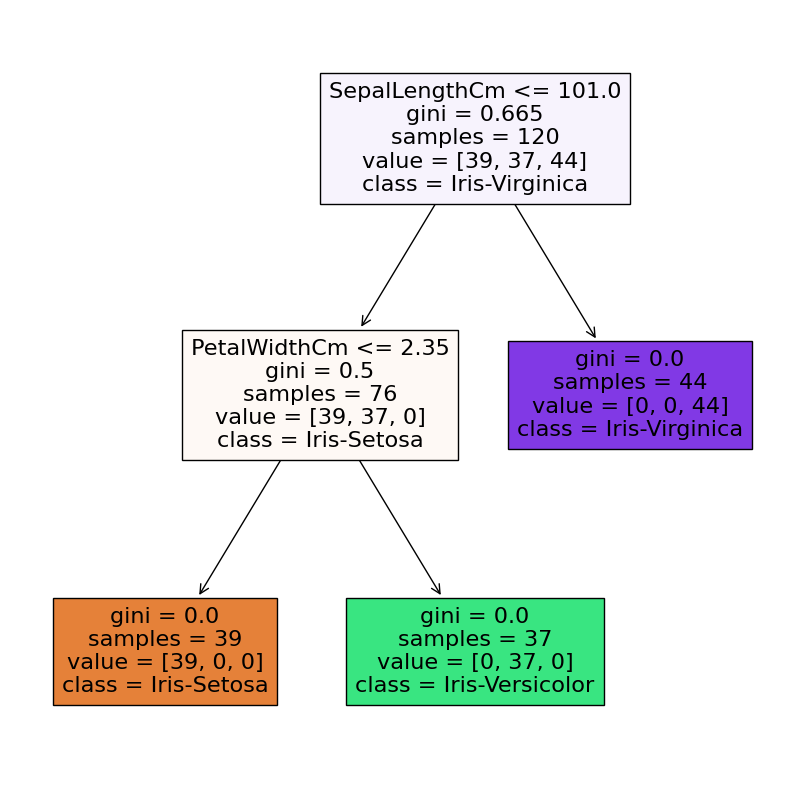

In [47]:
plt.figure(figsize=(10,10))
plot_tree(dtree,feature_names=feature,class_names=classes,filled=True);

In [48]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)
print("Support vector Classifier successfully implemented")
y_pred=svc.predict(x_test)

#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix:-")
print(cm)

#accuracy test
accuracy=accuracy_score(y_test,y_pred)
print("accuracy is:-",accuracy*100)
print("Classification Report:-")
print(classification_report(y_test,y_pred))

Support vector Classifier successfully implemented
Confusion matrix:-
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is:- 100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**KNN classifier**

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
print("K-nearest neighbors Classifier successfully implemented")
y_pred=knn.predict(x_test)

#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix:-")
print(cm)

#accuracy test
accuracy=accuracy_score(y_test,y_pred)
print("accuracy is:-",accuracy*100)
print("Classification Report:-")
print(classification_report(y_test,y_pred))

K-nearest neighbors Classifier successfully implemented
Confusion matrix:-
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is:- 100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Naive Bayes**

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train, y_train)
print("Naive bayes successfully implemented")
y_pred=gnb.predict(x_test)

#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix:-")
print(cm)

#accuracy test
accuracy=accuracy_score(y_test,y_pred)
print("accuracy is:-",accuracy*100)
print("Classification Report:-")
print(classification_report(y_test,y_pred))

Naive bayes successfully implemented
Confusion matrix:-
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is:- 100.0
Classification Report:-
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Result**



*   1.Accuracy Logistic Regression:-100%
*   1.Accuracy of Random Forest Classifier:-100%
*   1.Accuracy of Decision Tree:-100%
*   1.Accuracy of Support Vector Machine:-100%
*   1.Accuracy of K-NN Classifier:-100%
*   1.Accuracy of Naive Bayes:-100%







**Test Model**

In [51]:
input_data=(4.9,3.0,1.4,0.2)
#changing the input data to a numpy array
input_data_as_nparray=np.asarray(input_data)
#reshape the data as we are predicting the label for only the instance
input_data_reshaped=input_data_as_nparray.reshape(1,-1)
prediction=dtree.predict(input_data_reshaped)
print("The category is",prediction)

The category is [0]


# New section